# Mathematical Transformation
- Log Transformation
- Reciprocal Transformation
- Square Transformation
- Square Root Transformation

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm 
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

In [91]:
df = pd.read_csv('../../datasets/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [92]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [93]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

df.head()

/tmp/ipykernel_166277/550127950.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [94]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [95]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [96]:
x = df.iloc[:, 1:3]
y = df.iloc[:, 0]

print(f"{x=}\n{y=}")

x=           Age     Fare
0    22.000000   7.2500
1    38.000000  71.2833
2    26.000000   7.9250
3    35.000000  53.1000
4    35.000000   8.0500
..         ...      ...
886  27.000000  13.0000
887  19.000000  30.0000
888  29.699118  23.4500
889  26.000000  30.0000
890  32.000000   7.7500

[891 rows x 2 columns]
y=0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

/tmp/ipykernel_166277/1948101492.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


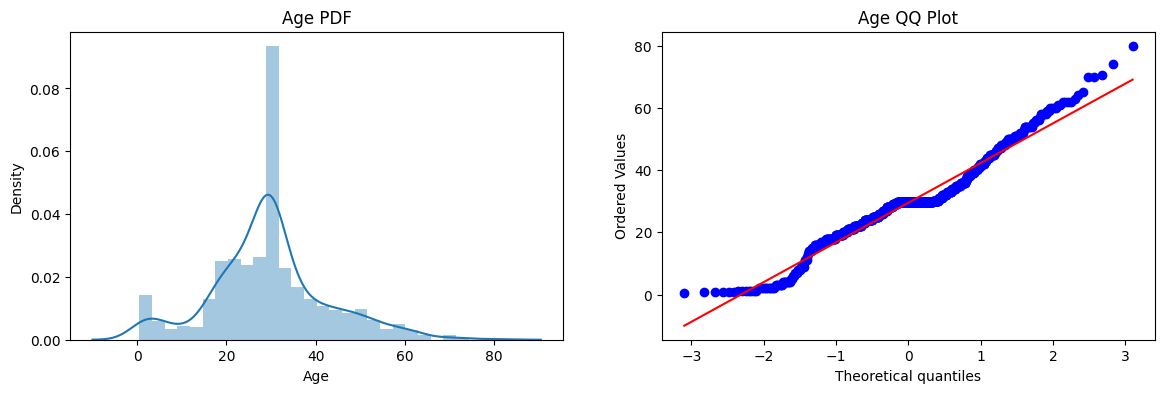

In [98]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipykernel_166277/4217090933.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


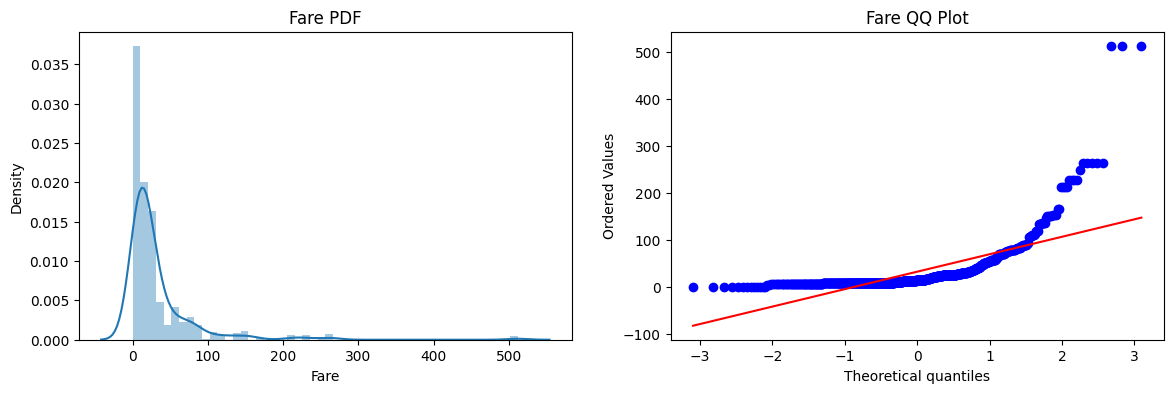

In [99]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [100]:
logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

In [101]:
logistic_clf.fit(x_train, y_train)
decision_tree_clf.fit(x_train, y_train)

logistic_y_predict = logistic_clf.predict(x_test)
decision_tree_y_predict = decision_tree_clf.predict(x_test)

print(f'LR: {accuracy_score(y_test, logistic_y_predict)}\nDT: {accuracy_score(y_test, decision_tree_y_predict)}')

LR: 0.6480446927374302
DT: 0.6536312849162011


In [102]:
function_transformer = FunctionTransformer(func=np.log1p)

In [103]:
x_train_transformed = function_transformer.fit_transform(x_train)
x_test_transformed = function_transformer.transform(x_test)

In [104]:
logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

logistic_clf.fit(x_train_transformed, y_train)
decision_tree_clf.fit(x_train_transformed, y_train)

logistic_y_predict = logistic_clf.predict(x_test_transformed)
decision_tree_y_predict = decision_tree_clf.predict(x_test_transformed)

print(f'LR: {accuracy_score(y_test, logistic_y_predict)}\nDT: {accuracy_score(y_test, decision_tree_y_predict)}')

LR: 0.6815642458100558
DT: 0.6703910614525139


In [105]:
x_transformed = function_transformer.fit_transform(x)

logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

lr = np.mean(cross_val_score(logistic_clf, x_transformed, y, scoring='accuracy', cv=10))
dt = np.mean(cross_val_score(decision_tree_clf, x_transformed, y, scoring='accuracy', cv=10))

print(f'{lr=} {dt=}')

lr=0.678027465667915 dt=0.6644319600499377


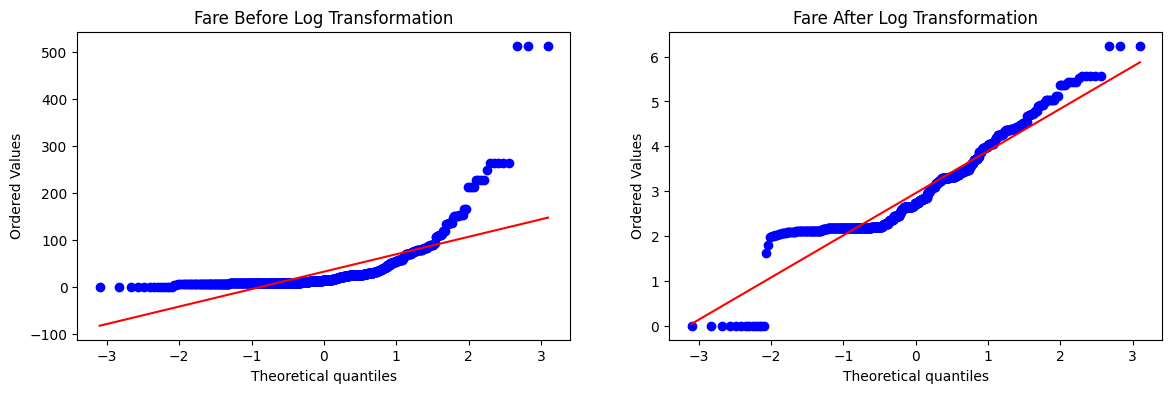

In [106]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log Transformation')

plt.show()

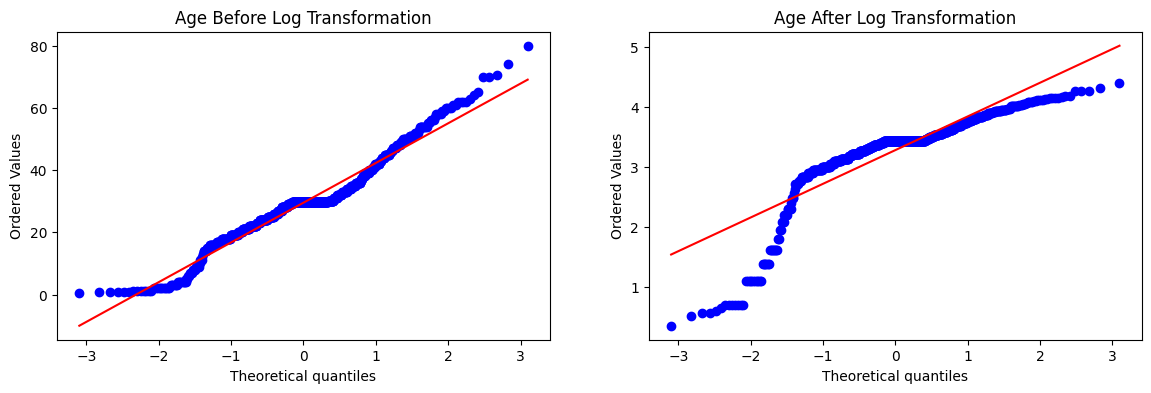

In [107]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log Transformation')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log Transformation')

plt.show()

In [108]:
column_transformer = ColumnTransformer(
    [('log', FunctionTransformer(np.log1p), ['Fare'])],
    remainder='passthrough'
)

x_train_transformed2 = column_transformer.fit_transform(x_train)
x_test_transformed2 = column_transformer.transform(x_test)


In [109]:
logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

logistic_clf.fit(x_train_transformed2, y_train)
decision_tree_clf.fit(x_train_transformed2, y_train)

logistic_y_predict = logistic_clf.predict(x_test_transformed2)
decision_tree_y_predict = decision_tree_clf.predict(x_test_transformed2)

print('LR: ', accuracy_score(y_test, logistic_y_predict))
print('DT: ', accuracy_score(y_test, decision_tree_y_predict))

LR:  0.6703910614525139
DT:  0.6480446927374302


In [110]:
x_transformed2 = column_transformer.fit_transform(x)

logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

lr = np.mean(cross_val_score(logistic_clf, x_transformed2, y, scoring='accuracy', cv=10))
dt = np.mean(cross_val_score(decision_tree_clf, x_transformed2, y, scoring='accuracy', cv=10))

print(f'{lr=} {dt=}')

lr=0.6712609238451936 dt=0.6577153558052433


In [111]:
def apply_transformation(transform):
    x = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    column_transformer = ColumnTransformer(
        [('log', FunctionTransformer(transform), ['Fare'])],
        remainder='passthrough'
    )

    x_trans = column_transformer.fit_transform(x)
    logistic_clf = LogisticRegression()

    accuracy = np.mean(cross_val_score(logistic_clf, x_trans, y, scoring='accuracy', cv=10))
    print(f"{accuracy=}")

    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before Transformation')

    plt.subplot(122)
    stats.probplot(x_trans[:, 0], dist='norm', plot=plt)
    plt.title('Fare After Transformation')

    plt.show()

accuracy=0.6589013732833957


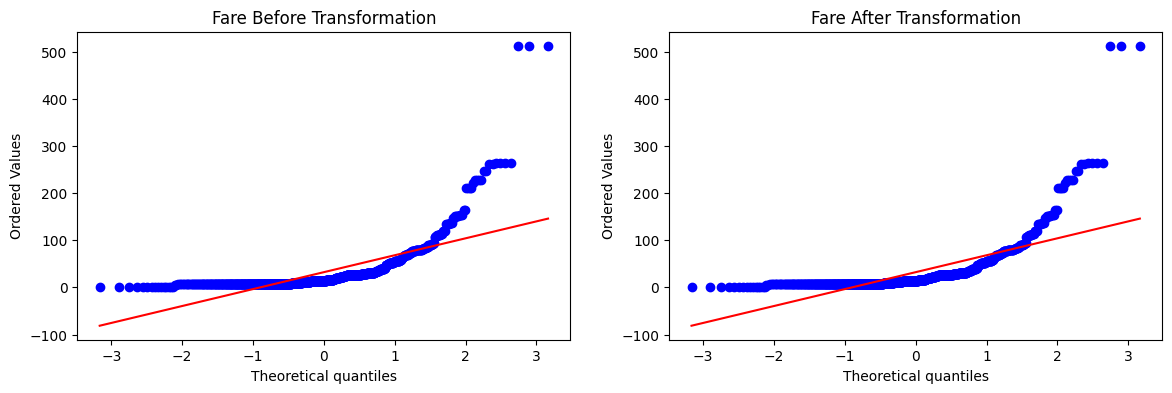

In [112]:
# No Transformation
apply_transformation(lambda x: x)

accuracy=0.6431335830212235


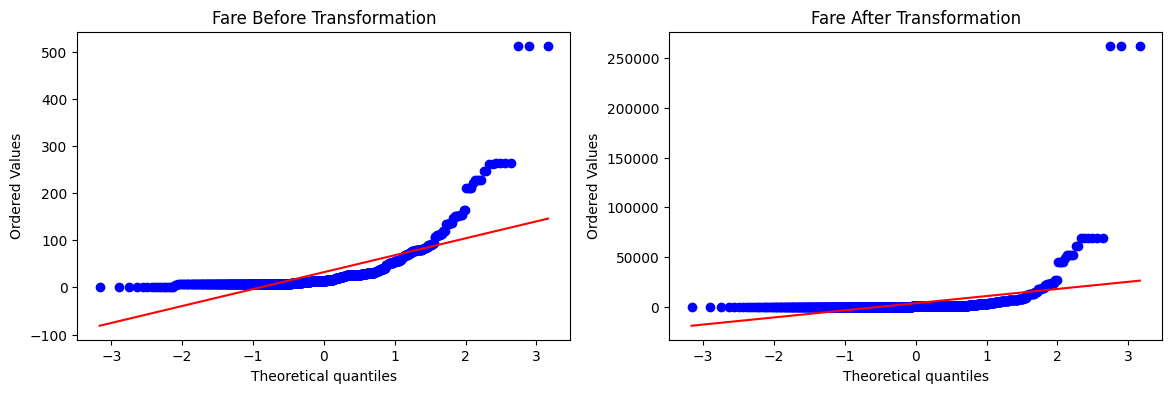

In [113]:
# Square Transformation
apply_transformation(lambda x: x**2)

accuracy=0.6611485642946316


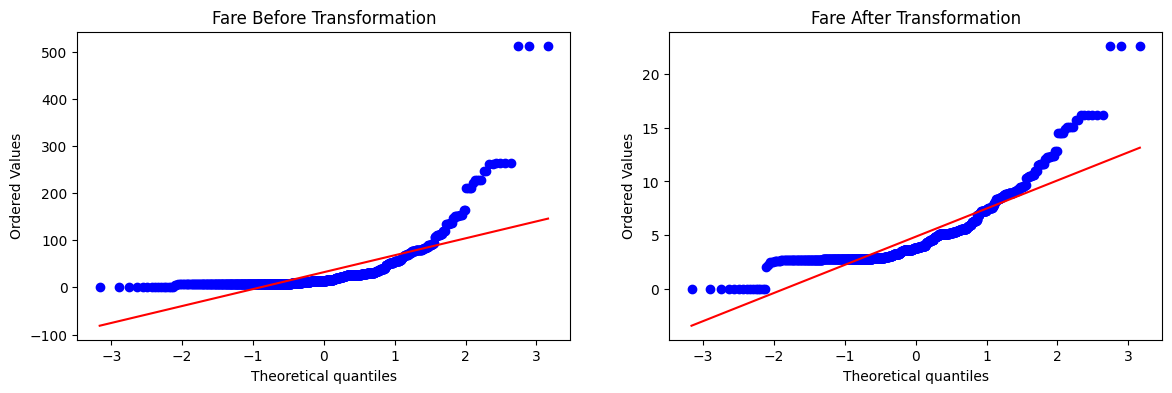

In [114]:
# Square Root Transformation
apply_transformation(lambda x: (x**(1/2)))

accuracy=0.61729088639201


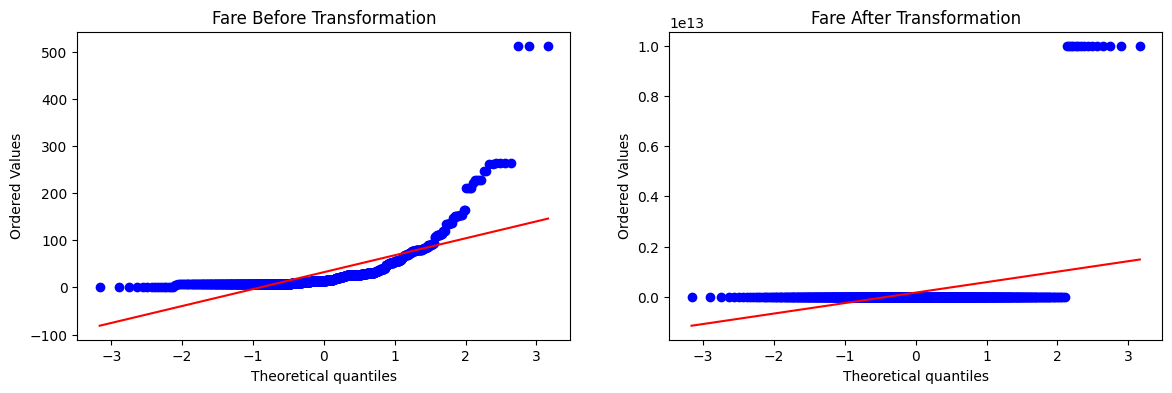

In [115]:
# Reciprocal Transformation
apply_transformation(lambda x: 1/(x + 0.0000000000001))

accuracy=0.6712609238451936


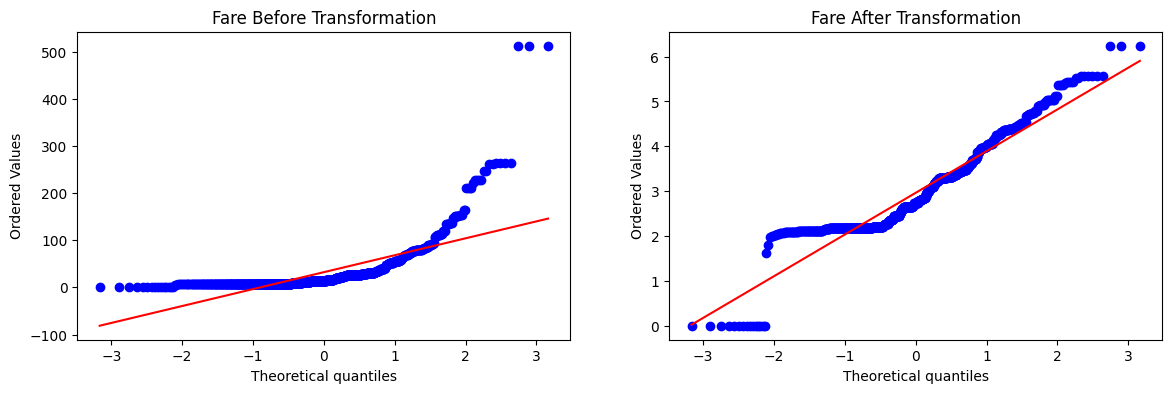

In [116]:
# Log Transformation
apply_transformation(np.log1p)

accuracy=0.616167290886392


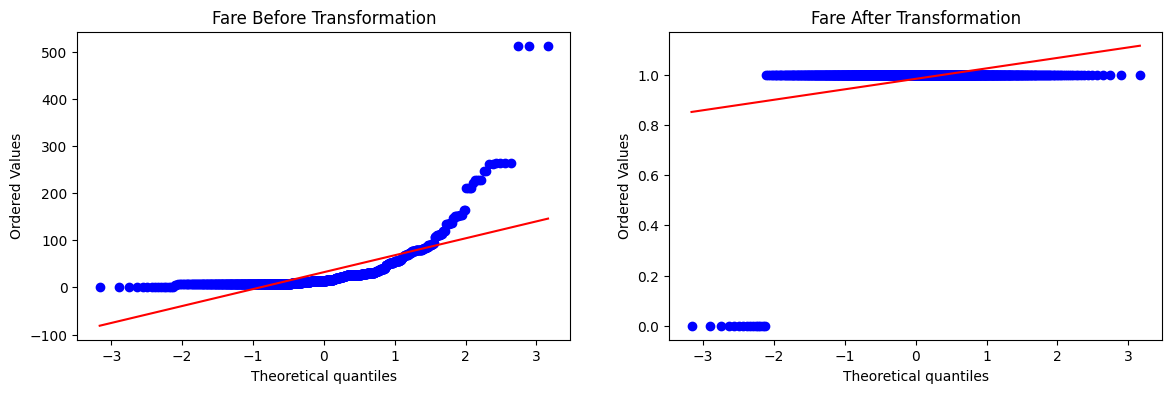

In [117]:
apply_transformation(np.sign)

# Power Transformation
- Box-Cox Transformation
- Yeo-Johnson Transformation

In [2]:
concrete_data = pd.read_csv('./concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
concrete_data.shape

(1030, 9)

In [4]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
X = concrete_data.drop(columns=['Strength'])
y = concrete_data.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)
linear_regression_y_predict = linear_regression.predict(X_test)

r2_score(y_test, linear_regression_y_predict)

0.627553179231485

In [11]:
linear_regression = LinearRegression()
np.mean(cross_val_score(linear_regression, X, y, scoring='r2'))

0.46099404916628606

/tmp/ipykernel_191686/867203281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


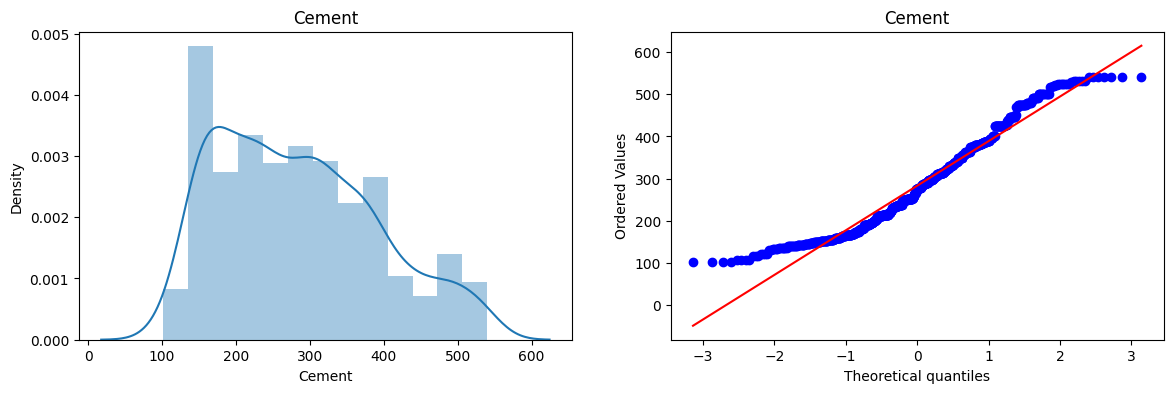

/tmp/ipykernel_191686/867203281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


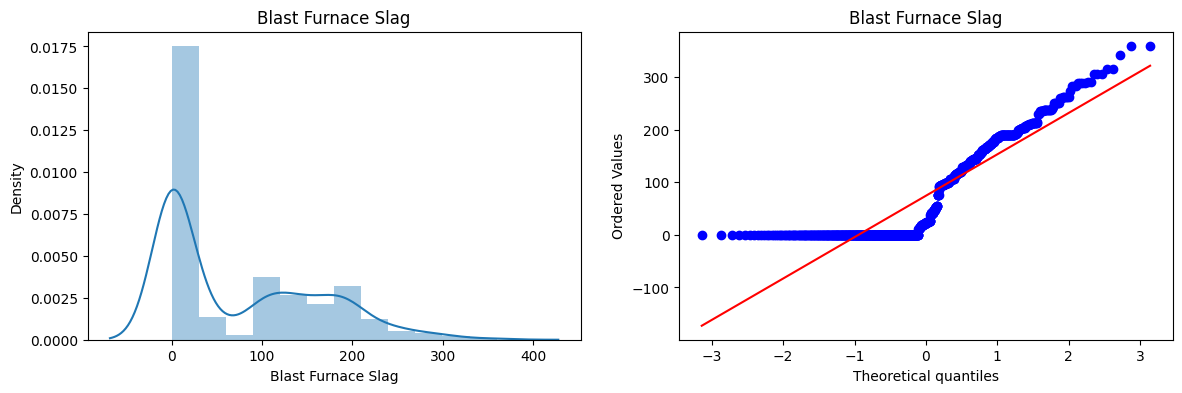

/tmp/ipykernel_191686/867203281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


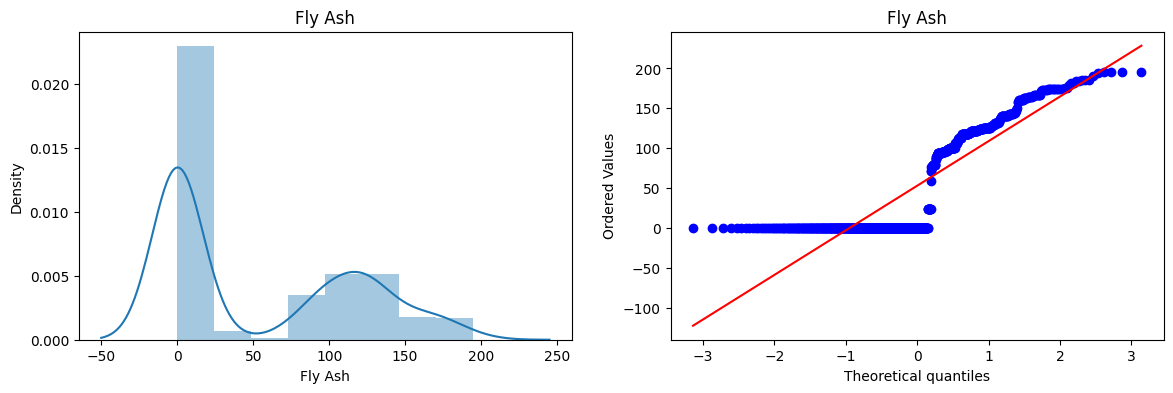

/tmp/ipykernel_191686/867203281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


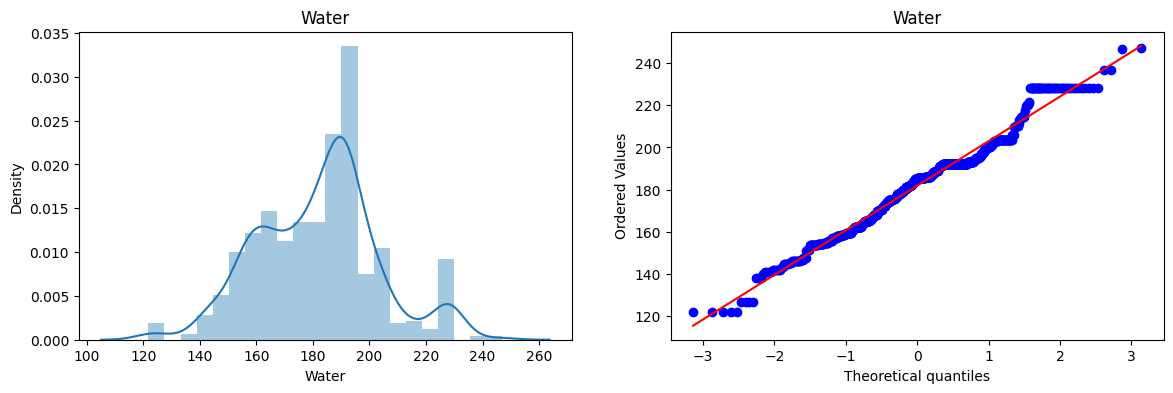

/tmp/ipykernel_191686/867203281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


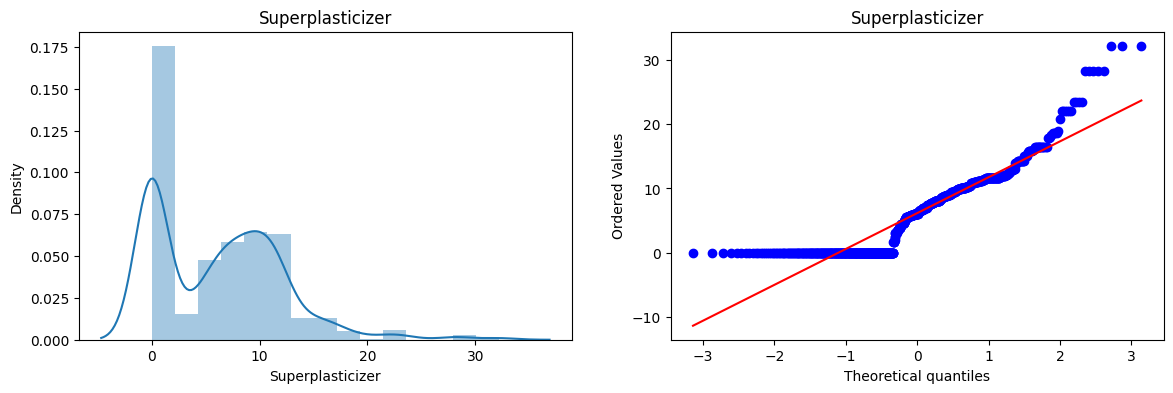

/tmp/ipykernel_191686/867203281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


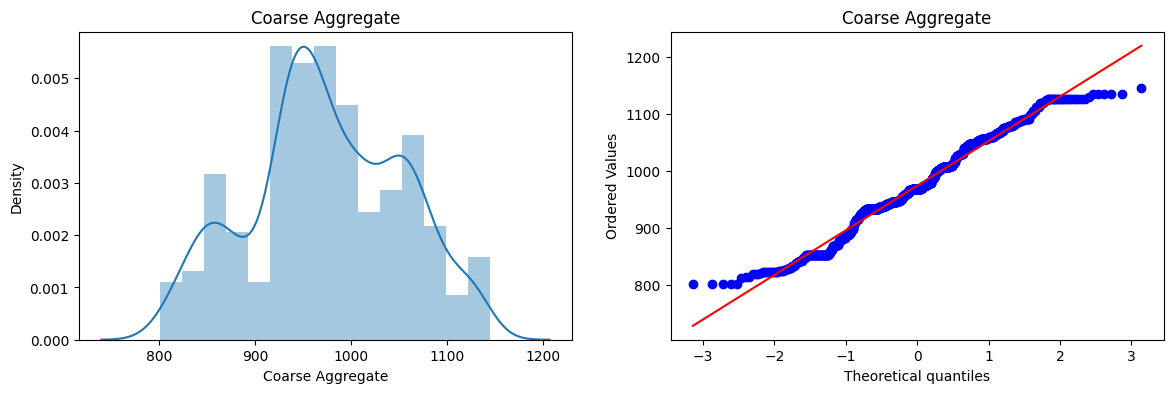

/tmp/ipykernel_191686/867203281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


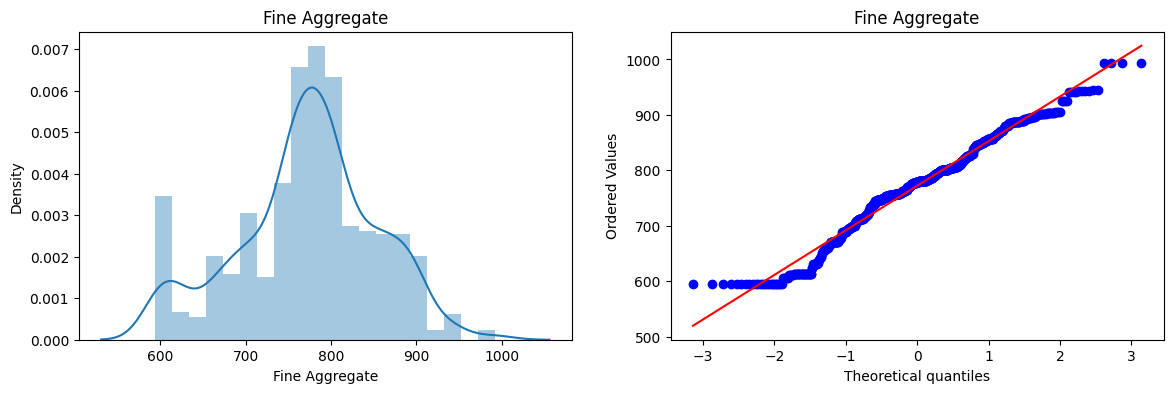

/tmp/ipykernel_191686/867203281.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])


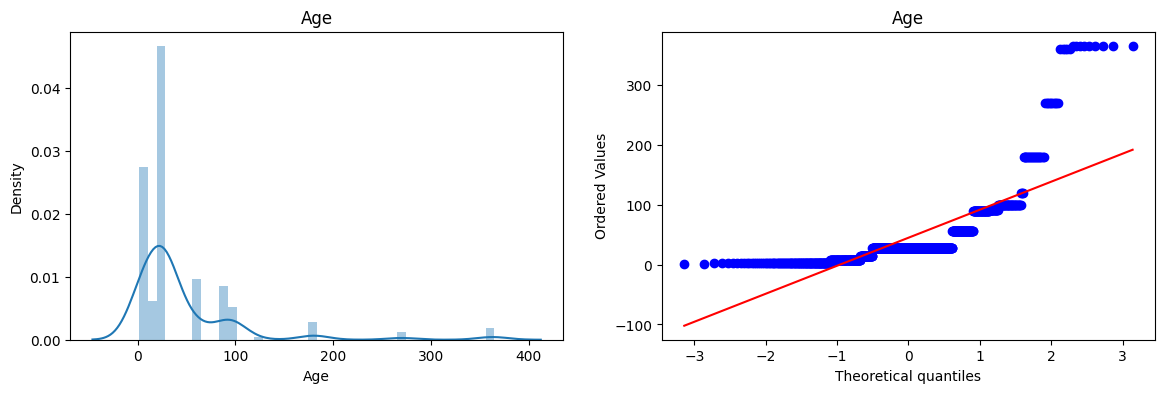

In [14]:
for column in X_train.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.distplot(X_train[column])
    plt.title(column)

    plt.subplot(122)
    stats.probplot(X_train[column], dist='norm', plot=plt)
    plt.title(column)

    plt.show()

In [15]:
power_transformer = PowerTransformer()

X_train_transformed = power_transformer.fit_transform(X_train+0.000001)
X_test_transformed = power_transformer.transform(X_test+0.000001)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': power_transformer.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [17]:
linear_regression = LinearRegression()

linear_regression.fit(X_train_transformed, y_train)
linear_regression_y_predict = linear_regression.predict(X_test_transformed)

r2_score(y_test, linear_regression_y_predict)

0.8161906541864055

In [20]:
power_transformer = PowerTransformer(method='box-cox')
X_transformed = power_transformer.fit_transform(X + 0.000001)

linear_regression = LinearRegression()
np.mean(cross_val_score(linear_regression, X_transformed, y, scoring='r2'))

0.6662950324463968

/tmp/ipykernel_191686/307708335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/307708335.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[column])


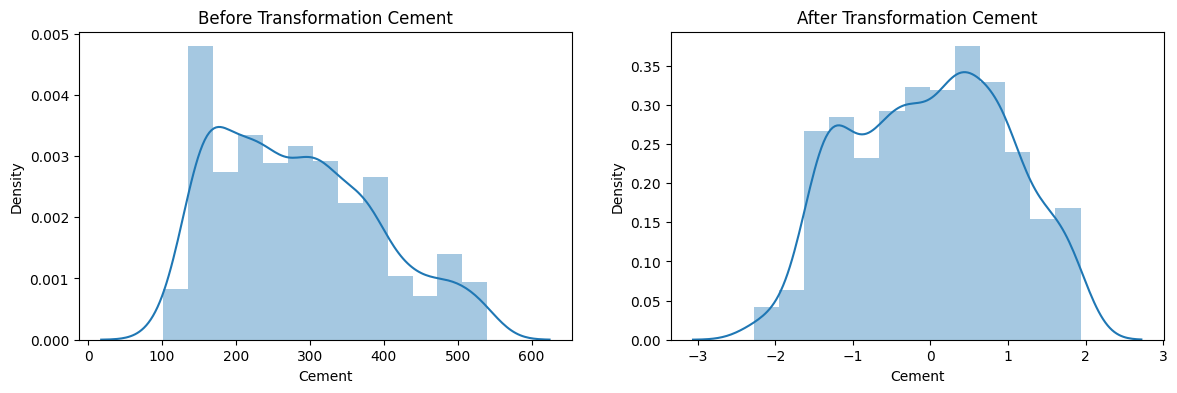

/tmp/ipykernel_191686/307708335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/307708335.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[column])


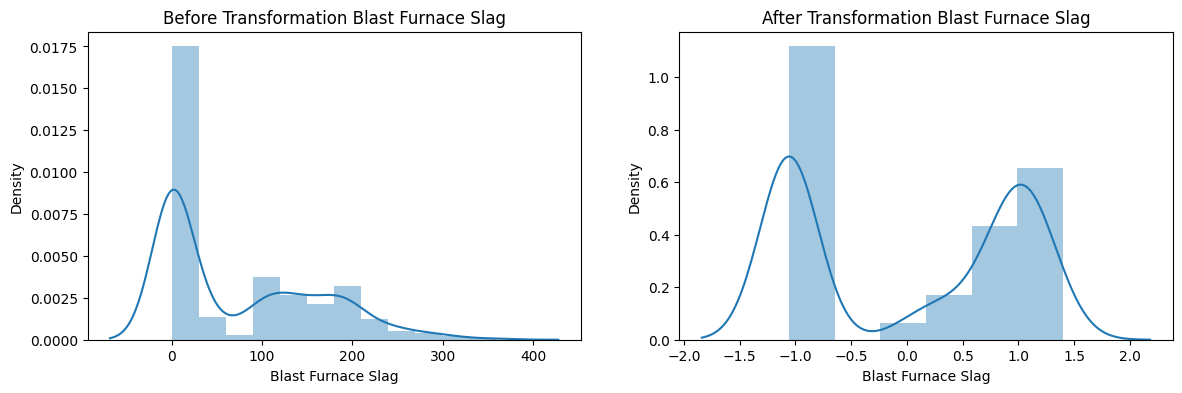

/tmp/ipykernel_191686/307708335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/307708335.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[column])


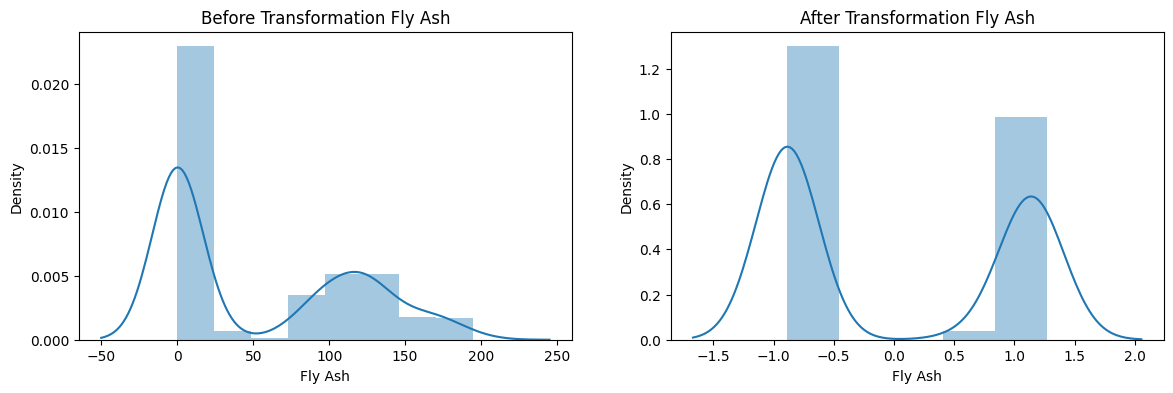

/tmp/ipykernel_191686/307708335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/307708335.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[column])


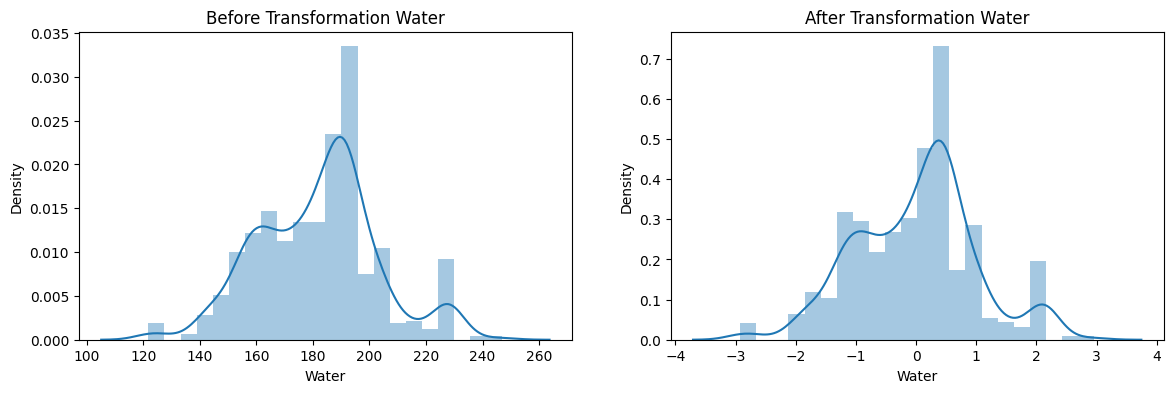

/tmp/ipykernel_191686/307708335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/307708335.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[column])


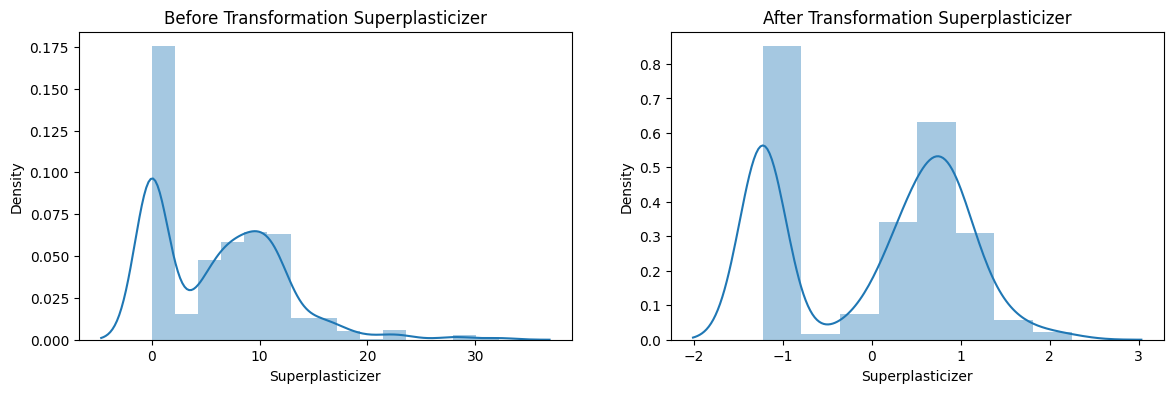

/tmp/ipykernel_191686/307708335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/307708335.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[column])


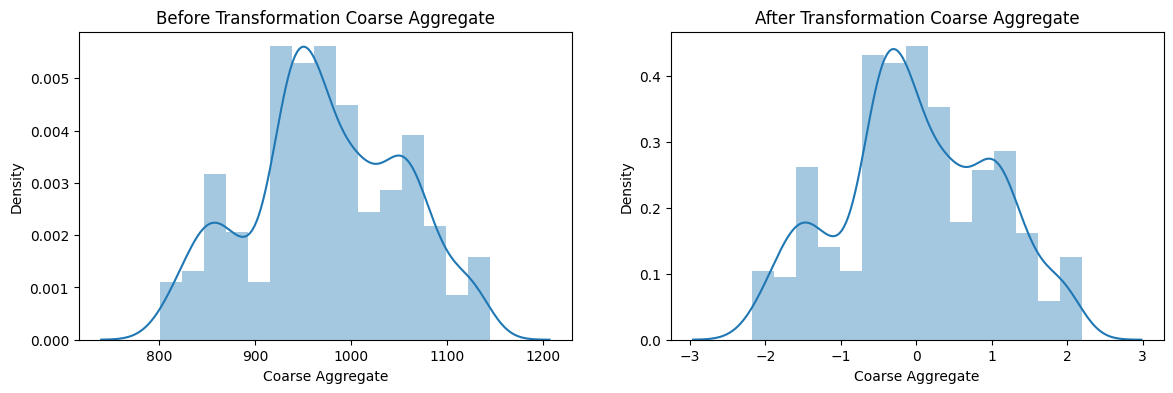

/tmp/ipykernel_191686/307708335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/307708335.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[column])


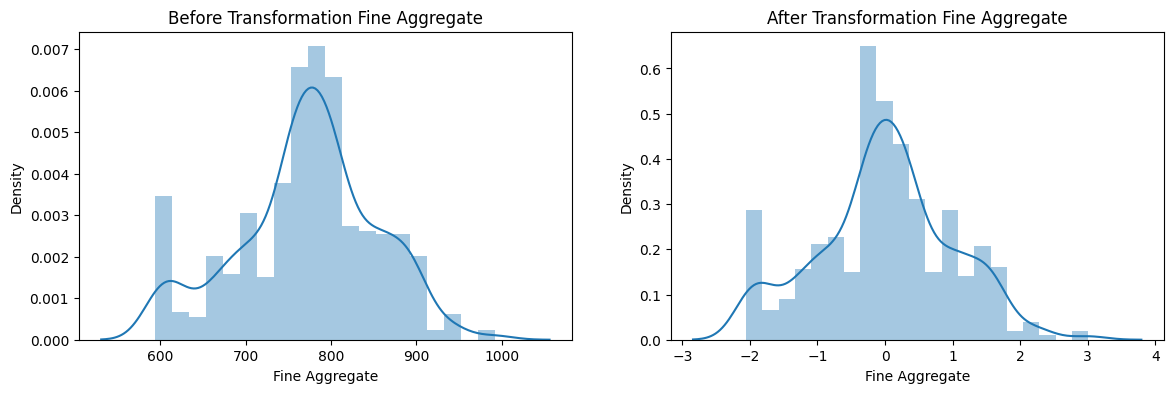

/tmp/ipykernel_191686/307708335.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/307708335.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed[column])


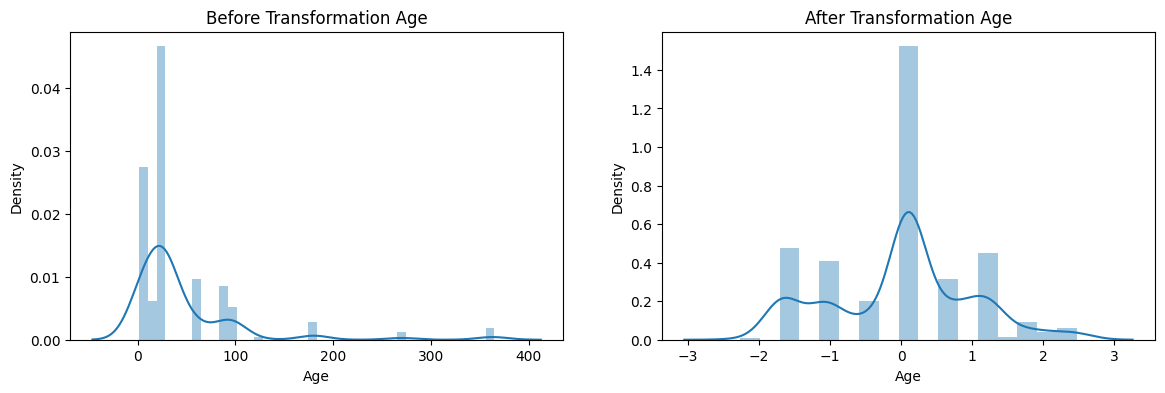

In [22]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for column in X_train.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.distplot(X_train[column])
    plt.title(f"Before Transformation {column}")

    plt.subplot(122)
    sns.distplot(X_train_transformed[column])
    plt.title(f"After Transformation {column}")

    plt.show()

In [24]:
power_transformer = PowerTransformer()

X_train_transformed2 = power_transformer.fit_transform(X_train)
X_test_transformed2 = power_transformer.transform(X_test)

linear_regression = LinearRegression()
linear_regression.fit(X_train_transformed2, y_train)

linear_regression_y_predict3 = linear_regression.predict(X_test_transformed2)

print(r2_score(y_test, linear_regression_y_predict3))

pd.DataFrame({'cols': X_train.columns, 'Yeo_Johnson_lambdas': power_transformer.lambdas_})

0.8161906512004999


,cols,Yeo_Johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


/tmp/ipykernel_191686/2839975227.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/2839975227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[column])


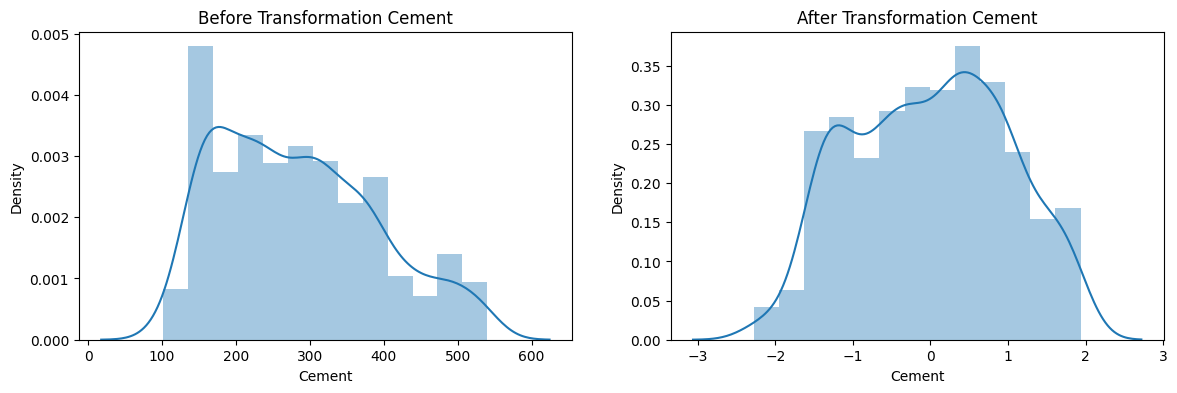

/tmp/ipykernel_191686/2839975227.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/2839975227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[column])


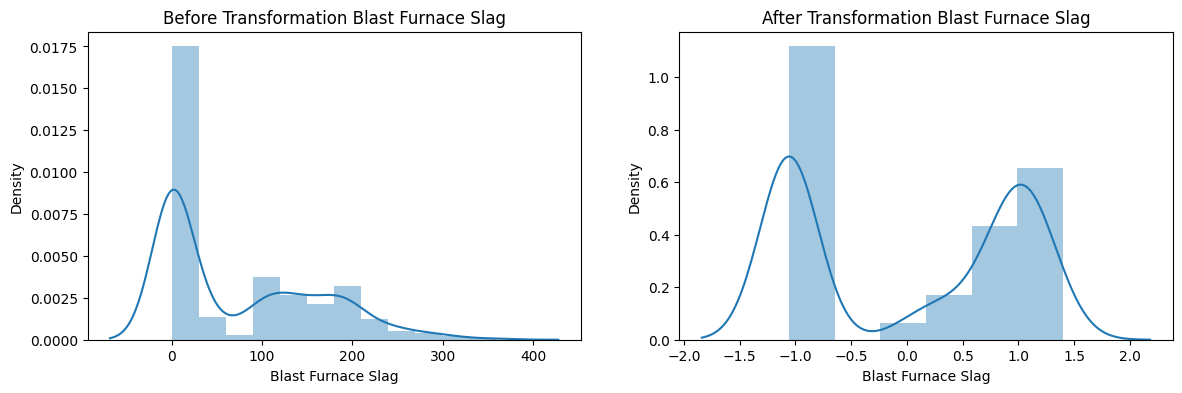

/tmp/ipykernel_191686/2839975227.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/2839975227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[column])


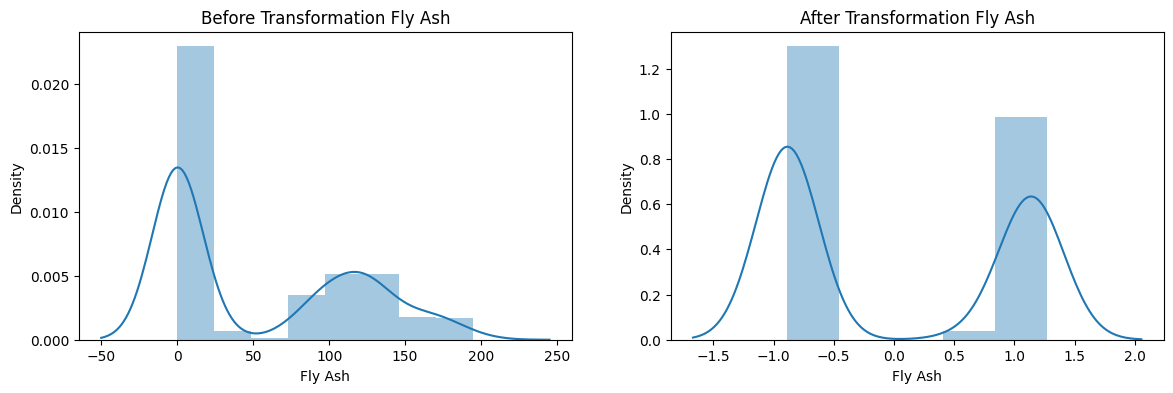

/tmp/ipykernel_191686/2839975227.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/2839975227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[column])


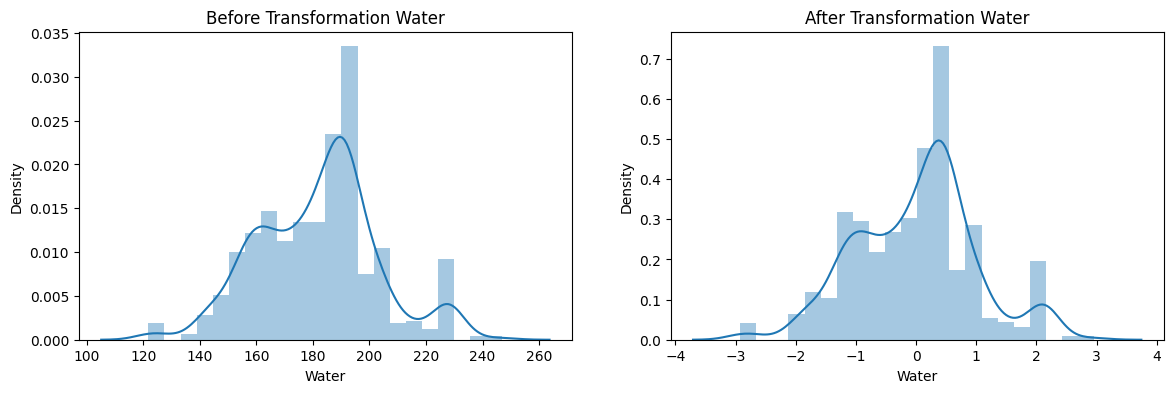

/tmp/ipykernel_191686/2839975227.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/2839975227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[column])


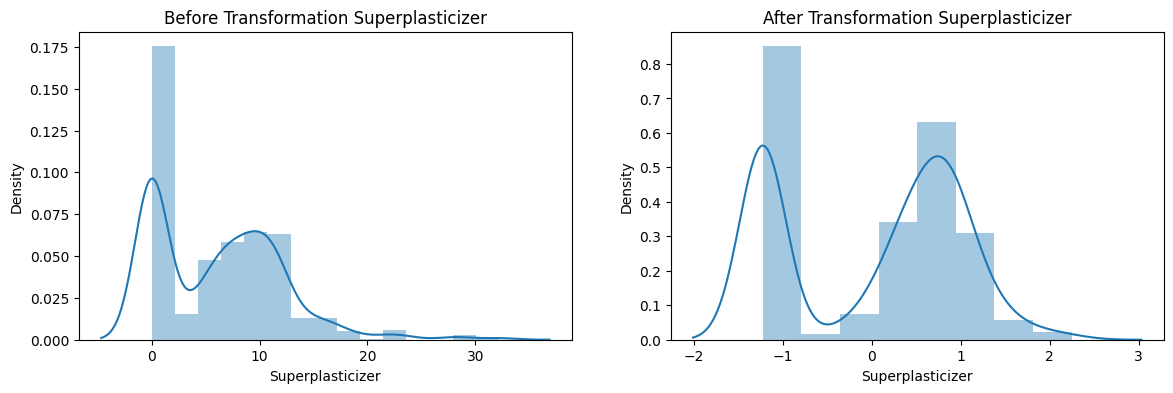

/tmp/ipykernel_191686/2839975227.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/2839975227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[column])


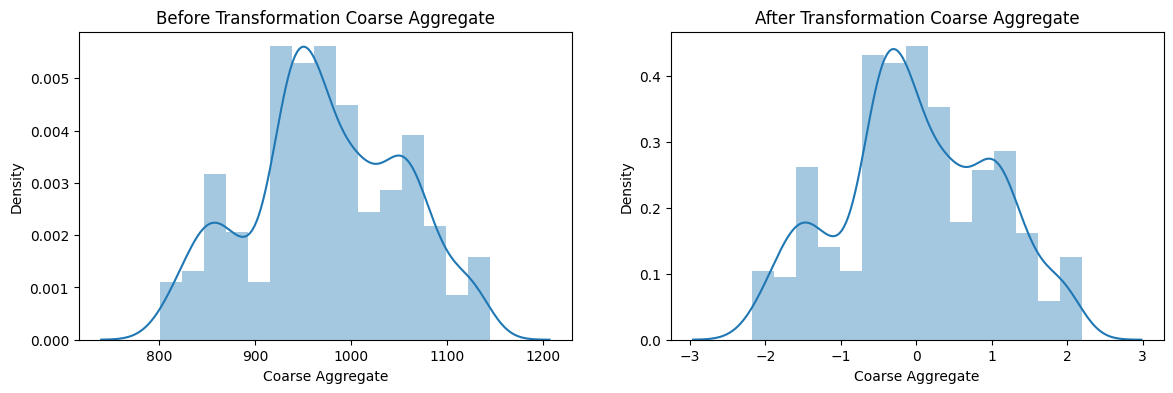

/tmp/ipykernel_191686/2839975227.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/2839975227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[column])


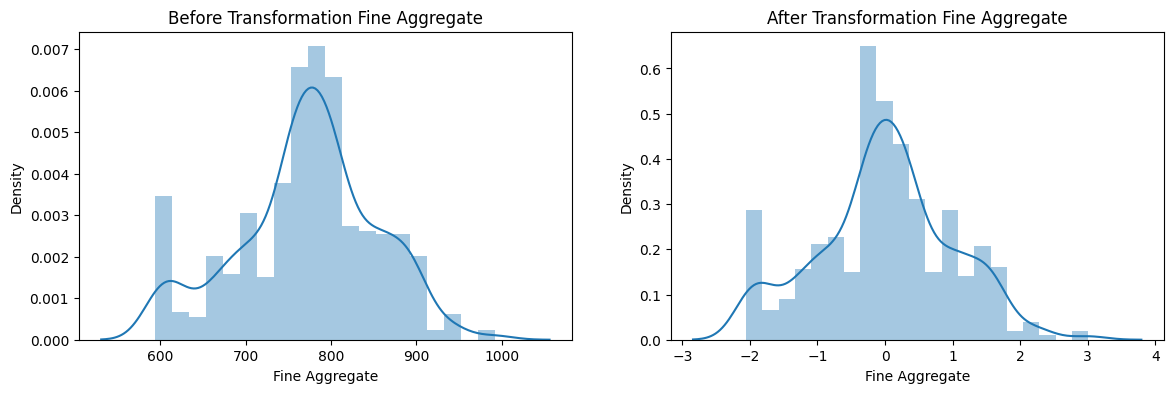

/tmp/ipykernel_191686/2839975227.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[column])
/tmp/ipykernel_191686/2839975227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_transformed2[column])


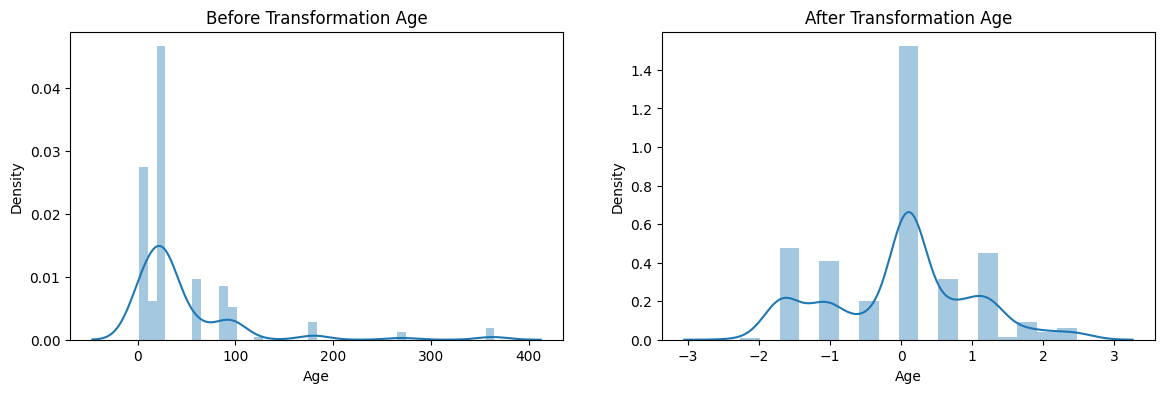

In [27]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

for column in X_train_transformed2.columns:
    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    sns.distplot(X_train[column])
    plt.title(f"Before Transformation {column}")

    plt.subplot(122)
    sns.distplot(X_train_transformed2[column])
    plt.title(f"After Transformation {column}")

    plt.show()